In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 5.8MB/s 
     |████████████████████████████████| 4.7MB 58.0MB/s 
     |████████████████████████████████| 317kB 68.9MB/s 
     |████████████████████████████████| 911kB 5.7MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 4.4MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp37-none-any.whl size=2667178 sha256=a33d099bd530a892c1f58f5dce47124315a56e68951978e274a318001f253412
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [ ]:
!pwd
!wget https://raw.githubusercontent.com/leandroradusky/AdvancedStatistics/master/data/Nutrients.csv
!mkdir Exam
!mv Nutrients.csv Exam/
%cd Exam/

/content
--2021-03-22 09:11:20--  https://raw.githubusercontent.com/leandroradusky/AdvancedStatistics/master/data/Nutrients.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605886 (592K) [text/plain]
Saving to: ‘Nutrients.csv’

Nutrients.csv       100%[===================>] 591.69K  --.-KB/s    in 0.05s   

2021-03-22 09:11:20 (11.4 MB/s) - ‘Nutrients.csv’ saved [605886/605886]

/content/Exam


In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import pymc3 as pm
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as st
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report


In [ ]:
!pwd

/content/Exam


In [106]:
NutrientsPath = "/content/Exam/Nutrients.csv"
Nutrients = open(NutrientsPath, "r")

In [107]:
df = pd.read_csv(NutrientsPath, sep="\t", header = (0), index_col = 0)
df.head()

,Water,Energ_Kcal,Protein,Lipid,Carbohydrt,Fiber,Sugar
Description,,,,,,,
"BUTTER,WITH SALT",15.87,717,0.85,81.11,0.06,0.0,0.06
"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,2.87,NaN,0.06
"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.0,0.00
"CHEESE,BLUE",42.41,353,21.40,28.74,2.34,0.0,0.50
"CHEESE,BRICK",41.11,371,23.24,29.68,2.79,0.0,0.51


In [108]:
df_babyfood = df[df.index.str.find("BABYFOOD") != -1]
df_not_babyfood = df[df.index.str.find("BABYFOOD") == -1]

In [109]:
df_cat = df.copy()
df_cat.index = [x[0] for x in df_cat.index.str.split(",")]

### **1) Explain the statistical reasoning that you would make to check the affirmation "baby food is more energetic than other food". This is a vague affirmation, interpret it and reformule it as an unambiguous proposition. Check the veracity of your unambiguous affirmation and explain carefully how the results that you obtained have to be interpreted and its significance.**

To modify this afirmation and say it as unambiguous proposition we would have to say that the distribution of the energetic value of the baby food has a mean greater than the other food, and the differences between the means are statistically significant, so we can be sure that the values of the energetic value of the babyfood and the values of other food come from a different distributions. <br>

In order to check if the statement is true would check if the energy distribution is the same for both datasets, to do so we have to compare the data for both datasets and test if they come from the same distribution. If I would have to guess, I would say that the baby food is more energetic since it normally contains more sugar and a lot of other nutrients to help the baby's growth.
<br>
To see it visually, the easiest way is to plot the distribution of the energy of the baby food and the other food, this way we can see if there are differences. And to test it quantitatively I would make a t-test, considering that both distributions are normally distributed, to see if there are significative differences between both distributions. 

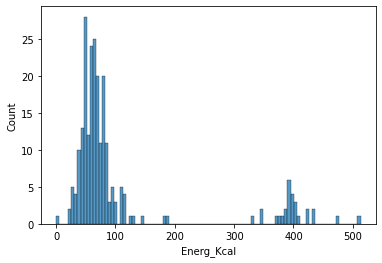

In [ ]:
sns.histplot(df_babyfood["Energ_Kcal"], bins = 100)

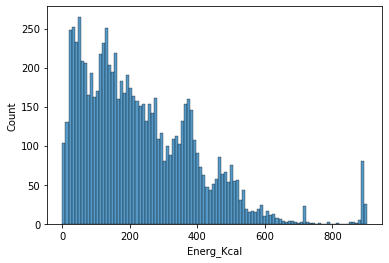

In [ ]:
sns.histplot(df_not_babyfood["Energ_Kcal"], bins = 100)

In [ ]:
scipy.stats.ttest_ind(df_not_babyfood["Energ_Kcal"], df_babyfood["Energ_Kcal"], axis=0, equal_var=True)

Ttest_indResult(statistic=11.287498310260114, pvalue=2.407314666055548e-29)

We see that the baby food does not seem to be more energetic than the other food, and that both data comes from the same distribution.

### **2) Which variables you would consider important in order to make a regression of the Energy variable? Justify your reasoning.**

To make a regression on the energy, I would consider the variables that have energy and, therefore, have an influence on it. I would consider Proteins, Lipids and Carbohydrats. Water and Fiber will be not considered since they do not contain energy. And sugar, although it contains energy, it is already conted in the Carbohydrats, so taking this into account would count two times for the same variable. <br>

When I say something does not contain energy I am not saying that Einstein was wrong with its formula, I mean that that feature can not be digested by humans and converted into energy.

### **3) Describe the distribution that you expect each the variable within the study will follow**

I would expect for each variable a normal distribution skeewen to the left (left-modal). Since the contents of the food will have proteins, carbos and lipids that the majority will have the same values between 0 and 50 more or less. Being the carbos the ones with the highest mean, followd by proteins and being the fat the feature with the lowest mean. Then I would expect the sugar and fiber to follow a similar distribution than the carbos but with lower means, since sugar and fiber are included in carbos. Finally for the water I would expect a distribution not as skeewed, since I think is as probable to find a food with low water than find a food with high content of water. 

For the energy we have already seen the distribution and, as I suspect that it will follow a similar distribution as proteins, fat and carbos, it will also be normally distributed and skeewed to the left. 

The best way to prove my assumptions would be to make a plot and check the distributions that each feature follows.

### **4 ) Make a bayesian regression using these variables, explain your results and check the accuracy of the results on predicting the Energy as a function of these variables.**

The Bayesian Regression will allow us to infer the values of the parameters of the regression, by doing this we are obtaining the whole distribution of the parameter instead of a single value. This is done using the Markov Chain Monte Carlo method with the Metropolis Algorithm, which allow us to sample from the posterior distribution and infer the distribution of the parameter by exploring the high dimensional space.

As we already know how much energy has each variable, we can already know which will be the regression coefficents for each variable. 9 kcal/g for fat and 4 kcal/g for proteins and carbohydrats.

I will assume that the variables and the coefficients follow all a normal distribution, and the standard deviation and the mean will be set to follow a uniform distribution with unopinionated parameters, between 0 and 100. <br>
The error will be set to follow also a normal distribution.

I try to infer the parameters with unopinionated guesses because I already know more or less which have to be the result of the parameters. If the result I obtain is not what I expect, I will try to narrow my assumptions with more subjective priors. 

In [ ]:
with pm.Model() as energy_model:
  # Set the unopinionated standard deviation
  std = pm.Uniform("std", lower=0, upper=100)
  mu = pm.Uniform("mu", lower=0, upper=100)

  # Variables
  protein = pm.Normal("prot", mu=df["Protein"].mean(), observed = df["Protein"])
  fat = pm.Normal("fat", mu=df["Lipid"].mean(), observed = df["Lipid"])
  carb = pm.Normal("carb", mu=df["Carbohydrt"].mean(), observed = df["Carbohydrt"])

  # Error
  error = pm.Normal("error", mu=0, sigma=std)

  # Regression coeficients
  prot_coeff = pm.Normal("prot_coeff", mu=mu, sigma=std )
  fat_coeff = pm.Normal("fat_coeff", mu=mu, sigma=std )
  carb_coeff = pm.Normal("carb_coeff", mu=mu, sigma=std )
  par_intercept = pm.Normal("par_intercept", mu=mu, sigma=std)


  # Deterministic variables that depends of random variables are set like this
  mean = pm.Deterministic("mean", par_intercept + prot_coeff*protein + fat_coeff*fat + carb_coeff*carb)

  # Petal width

  energy = pm.Normal("energy", mu=mean, sigma=std, observed=df["Energ_Kcal"])

  trace = pm.sample(draws=10000, tune = 5000,step=pm.Metropolis(), cores = 5) 


Multiprocess sampling (5 chains in 5 jobs)
CompoundStep
>Metropolis: [par_intercept]
>Metropolis: [carb_coeff]
>Metropolis: [fat_coeff]
>Metropolis: [prot_coeff]
>Metropolis: [error]
>Metropolis: [mu]
>Metropolis: [std]
Sampling 5 chains, 0 divergences: 100%|██████████| 75000/75000 [02:02<00:00, 612.03draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27cb178990>,
      dtype=object)

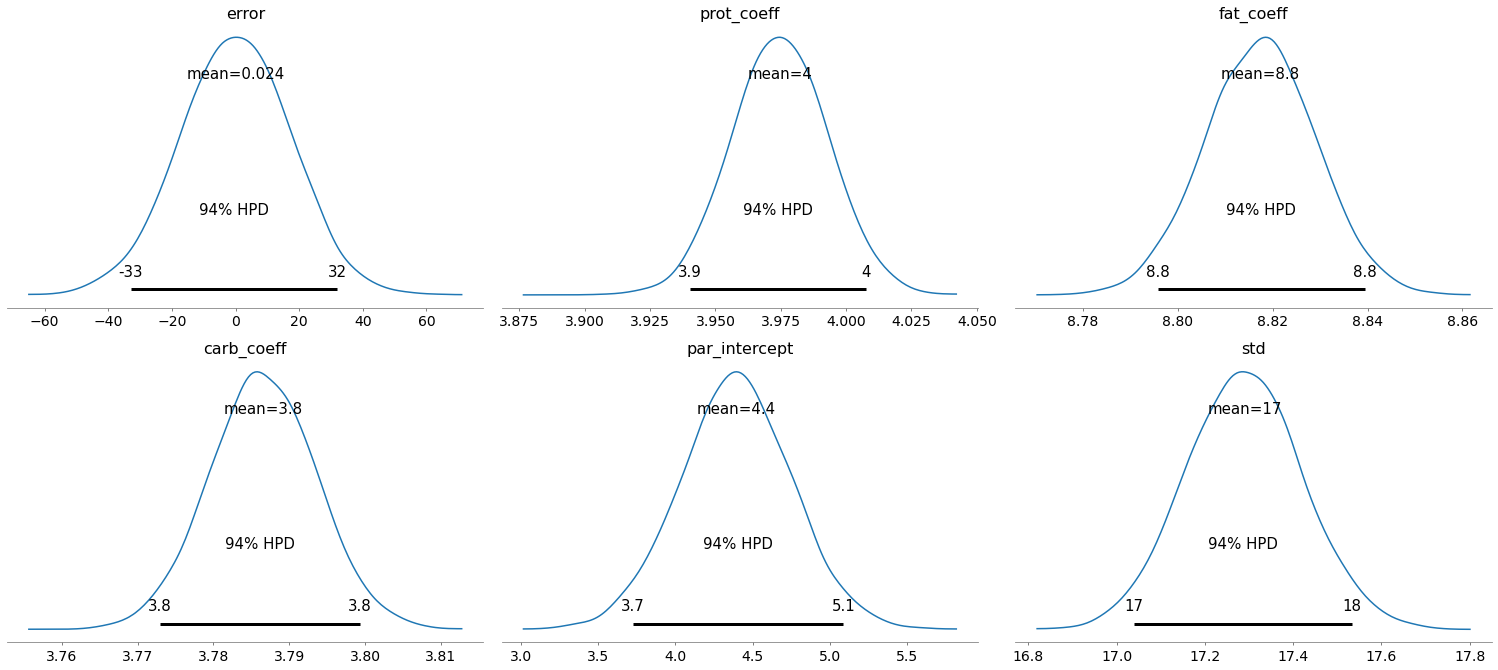

In [ ]:
pm.plot_posterior(trace[1000:], var_names=["error", "prot_coeff", "fat_coeff", "carb_coeff", "par_intercept", "std"])

/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27c0ffbc90>,
      dtype=object)

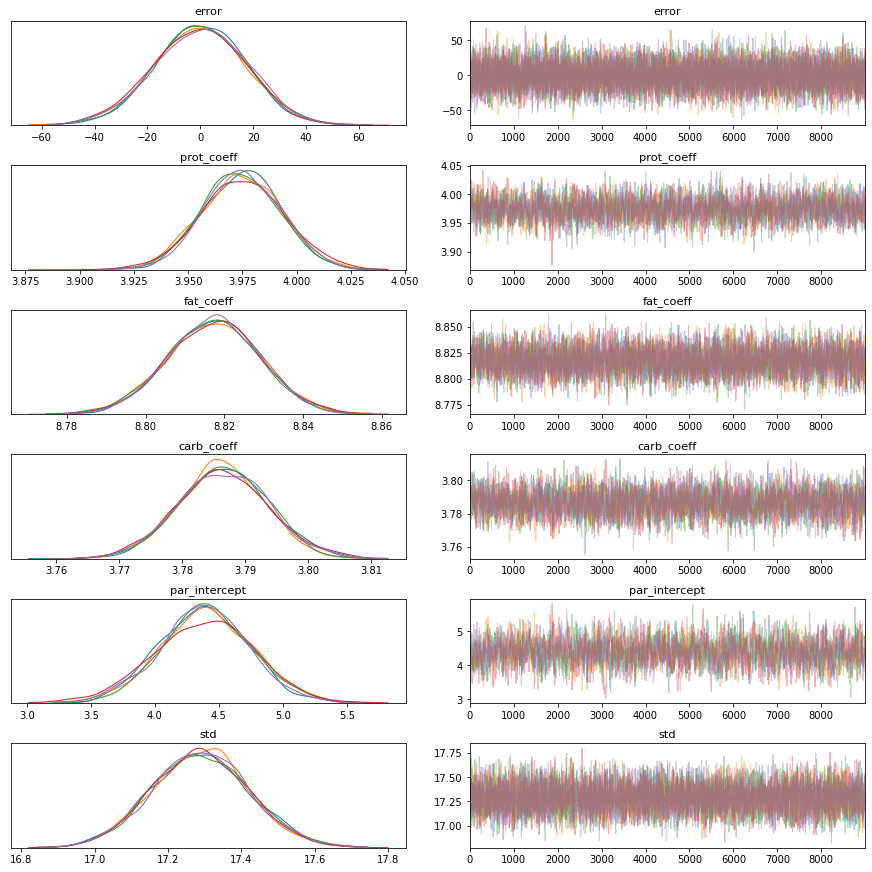

In [ ]:
pm.traceplot(trace[1000:], var_names=["error", "prot_coeff", "fat_coeff", "carb_coeff", "par_intercept", "std"])

We see how even with a very unopinonnated guesses, the convergence and the fit of the posteriors are very good. And the values obtained are the expected ones.

Now we will predict the data with the values we obtained from the bayesian regresssion. To make the fits I will use the mean of each estimator as the best estimate, but we have to take into account that with Bayesian Regression we are not obtaining best estimates, we are obtaining the whole posterior distribution of the parameters, which gives us much more information about it, since we can know if the value we obtain is precise or if it is actually a tough prediction and the distribution has a lot of variance. 

In this case, using the mean as the best estimate shouldn't be a problem since the distributions we obtained have low variance and the results are the ones we expected, so the values should work for the predictions.

In [ ]:
features = np.matrix(df.loc[:, [ "Protein",	"Lipid",	"Carbohydrt"]])

prot_coeff = 4 
fat_coeff = 8.8
carb_coeff = 3.8
par_intercept = 4.4

n = 0
predictions = []
for row in features:
  prediction = prot_coeff*row[0,0] + fat_coeff*row[0,1] + carb_coeff*row[0,2] + par_intercept
  predictions.append(prediction)


In [ ]:
predictions = np.asarray(predictions)
df["Predictions"] = predictions

In [ ]:
mse = mean_squared_error(df["Energ_Kcal"], df["Predictions"])
rmse = np.sqrt(mse)
rmse

17.299420235295766

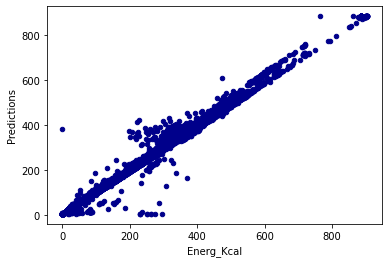

In [ ]:
ax1 = df.plot.scatter(x="Energ_Kcal",
                       y="Predictions",
                       c='DarkBlue')


When we check how the model predicts the data we see that the RMSE is 17.30, which seems to be a good result but should be compared with other models to say with security that our model is performing very well, but with this magnitude we can suspict that the model is working well.<br>
When we see that the model is performing well is when we plot the predictions against the real values, and we see that they fit quite well, although we have some outliers at lower values of energy.

### **5) Using df_cat DataFrame, and its index as labels, make a classificator using the half of the data (randomly taken) as training data and measure its accuracy to classify the remaining half.**

I will use random forest to make the classifiaction, since it is one of the best algorithms for classification. The algorithm uses what is called bagging to build the classifier, which consists on building a lot of trees by using subsets of random samples from the data, in which it builds the trees using random features. In this way, the algorithm preserves the accuracy of the Trees but makes the result less biased, which reduces the problem that the trees have of overfitting. Moreover, when new data comes, the algorithm do not has to be made again as the trees.  

In [ ]:
Training_data, Test_data = train_test_split(df_cat, shuffle=False, test_size= 0.5)


There are some missing values in the dataset, I will remove them because I have no time to infer them. But in order to avoid removing, we could have infered their values by using random forests.

In [ ]:

Training_data = Training_data.dropna()
Test_data = Test_data.dropna()

In [ ]:
rdnmforest = RandomForestClassifier()
rdnmforest.fit(Training_data[["Water",	"Energ_Kcal",	"Protein",	"Lipid",	"Carbohydrt",	"Fiber",	"Sugar"]], Training_data.index)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
good_rndforest_predictions = 0
bad_rndforest_predictions = 0
for index, sample in Test_data.iterrows():
  prediction = rdnmforest.predict([sample[["Water",	"Energ_Kcal",	"Protein",	"Lipid",	"Carbohydrt",	"Fiber",	"Sugar"]]])
  if prediction == index:
    good_rndforest_predictions += 1
  else:
    bad_rndforest_predictions += 1

accuracy = good_rndforest_predictions / (good_rndforest_predictions + bad_rndforest_predictions)
print("Ranfom Forest accuracy:" , accuracy)

Ranfom Forest accuracy: 0.13092085907619888


We see that the accuracy is very low, but this is because we have a lot of labels to classify, which means that we have a lot of overlapping functions that are difficult to split even for the random forest classifier. To improve our classifier, we could set more simple and general labels like cheese, beef and potatoes, try to classify again and see that probably the accuracy will improve.


###  6) **Propose a causal diagram for all the numerical variables within the data set.**




**(a) Which independence/dependence relationships are expected to be seen based on the diagram that you proposed?**

My relationships will be the following:

Sugar will explain carbos since the higher the amount of sugar the higher the amount of carbos, since it is a subset of carbos. We could think it on happening the other way around but it would be wrong, since the amount of carbos can increase or decrease without changing the amount of sugar. 

Sugar -> Carbo

For the fiber will happen the same as with sugar.

Fiber -> Carbo

Then, Carbo, Protein and Fat will explain the Energy since as we increase one of them the Energy increases. Since, as I have already said, this nutrients are digested and converted into energy.

Carbo -> Energy
Protein -> Energy
Fat -> Energy

Now we have stated the direct causes, let's now check the indirect causes:

~I(Fiber,Ø,Energy): The only path between them is Carbo and it is inactive.
~I(Sugar,Ø,Energy): The same as fiber.

Collider Energy makes the following three variables independent of Protein and Fat:
I(Carbo,Ø,Protein)
I(Sugar,Ø,Protein)
I(Fiber,Ø,Protein)
I(Carbo,Ø,Fat)
I(Fiber,Ø,Fat)
I(Sugar,Ø,Fat)
The collider Carbo makes independent the following two varibales:
I(Sugar,Ø,Fiber)





**(b) Explain how the fact of having always 100g of the foods influences the relationships among the variables.**

This will lead to a situation in which variables that are supposed to be independent will become dependent. For example, if the amount of food is not limited, conditioning on Fat does not make Carbo and Protein dependent, since they have still a collider between them. However, if the amount of food is 100g, if we condition on fat, all the food amount of energy that is not explained by carbo will have to be explained by proteins, since the total amount of food have to be a certain number, which the sum of the nutrients. 

Here we should take into account the water that has not been taken into account. (I don't have time to explain this).